In [46]:
from ephys_queries import select_waveforms, db_setup_core
from waveform_utils.waveforms import (
    waveform_peaks_by_neuron, 
    waveform_width_by_neuron,
    peak_asymmetry_by_neuron
)
from waveform_utils.plots import plot_waveform_peaks
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import numpy as np
from pathlib import Path

In [50]:
fig_dir = Path(".").absolute().parent / "figs"

In [25]:
load_dotenv()
engine, metadata = db_setup_core()
acute_groups = ("acute_citalopram", 
                "acute_saline", 
                "shock", 
                "sham", 
                "acute_cit", 
                "acute_sal"
                )
waveforms = select_waveforms(engine, metadata,
                            group_names=acute_groups).assign(time=lambda x: np.round(x["waveform_index"].divide(30), 3))
waveforms.head(2)

,neuron_id,waveform_value,waveform_index,group_name,time
0,1,-14.520,0.0,shock,0.000
1,1,-13.085,1.0,shock,0.033


In [30]:
peaks = waveform_peaks_by_neuron(waveforms, neuron_col="neuron_id", 
                         index_col="time", 
                         value_col="waveform_value").dropna()

In [42]:
neurons = waveforms["neuron_id"].values
neuron = np.random.choice(neurons, 1)[0]
neuron

1896

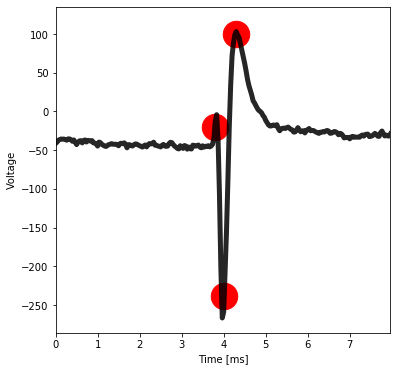

In [59]:
ax = plot_waveform_peaks(waveforms, df_peaks=peaks, neuron_id=neuron, 
                        df_waveforms_index_col= 'time', 
                         waveform_plot_kwargs={"linewidth":5}, 
                         peaks_plot_kwargs={"s":700})
ax.set_xlabel("Time [ms]")
ax.get_legend().remove()
plt.savefig(str(fig_dir / "waveform"), dpi=300)